<a href="https://colab.research.google.com/github/951237/TIL/blob/master/210705_%EC%95%88%EC%82%B0%EB%B6%80%EA%B3%A1%EC%B4%88_%ED%95%99%EC%83%9D%EC%88%98_%EC%98%88%EC%B8%A1_feat_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fbprophet

In [10]:
# 데이터 불러오기
# 데이터 주소 : /content/drive/MyDrive/data/ansanbugok/데이터 안산부곡초 연도별 인원.xlsx
import pandas as pd
FILE = '/content/drive/MyDrive/data/ansanbugok/데이터 안산부곡초 연도별 인원.xlsx'
df_enter = pd.read_excel(FILE, sheet_name='입학인원')
df_all = pd.read_excel(FILE, sheet_name='전체학생수')

print(df_enter.head())
print(df_all.head())

    년도       남      여   총학생수
0  1997    NaN    NaN    NaN
1  1998  160.0  152.0  312.0
2  1999  185.0  140.0  325.0
3  2000  188.0  147.0  335.0
4  2001  167.0  125.0  292.0
    년도     남    여  총학생수
0  2014  503  469   972
1  2015  502  480   982
2  2016  466  450   916
3  2017  451  454   905
4  2018  445  439   884


In [29]:
# 문자열 생성 - 월, 일
df_enter['월'] = '-03'
df_enter['일'] = '-01'

Index(['year', 'boy', 'sum', 'girl', 'mon', 'day'], dtype='object')

In [40]:
df_enter.columns = ['year', 'boy', 'girl','sum', 'mon', 'day', 'new_year']

In [33]:
# 숫자형을 문자형으로 바꾸기
df_enter['year'] = df_enter['year'].astype(str)

In [34]:
# 문자열 합치기
df_enter['new_year'] = df_enter['year'] + df_enter['mon'] + df_enter['day']

In [38]:
# 문자열 → 시계열 데이터로 변환
df_enter['new_year'] = pd.to_datetime(df_enter['new_year'])

In [43]:
# 필요한 열만 두기
df_enter = df_enter.loc[:, ['new_year', 'boy', 'girl', 'sum']]

In [45]:
# 결측데이터 제거
df_enter = df_enter.dropna(axis=0)

In [47]:
# 남자 인원만
df_boy = df_enter.loc[:, ['new_year', 'boy']]


In [50]:
# 칼럼명 변경
df_boy.columns = ['ds', 'y']

In [51]:

# 객체 생성
from fbprophet import Prophet
model = Prophet()

# 모델 학습
model.fit(df_boy)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.


In [65]:
# 예측하기
future = model.make_future_dataframe(periods=60, freq='M')
future.tail(5)


,ds
73,2025-10-31
74,2025-11-30
75,2025-12-31
76,2026-01-31
77,2026-02-28


In [66]:
forecast = model.predict(future)

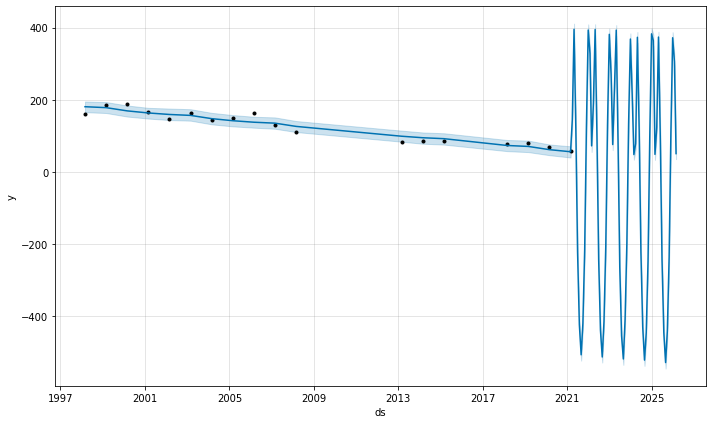

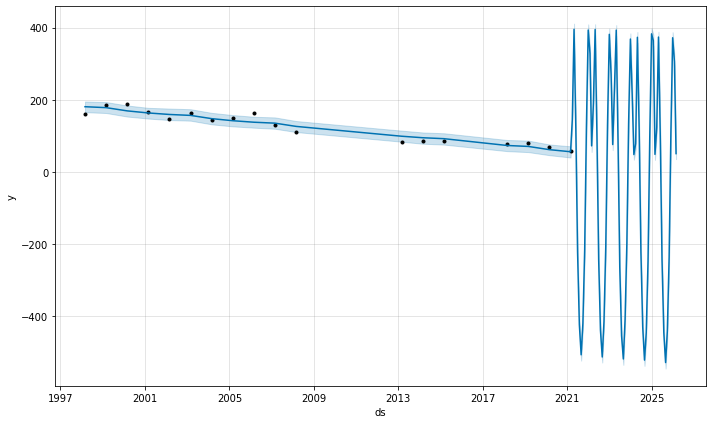

In [67]:
model.plot(forecast)

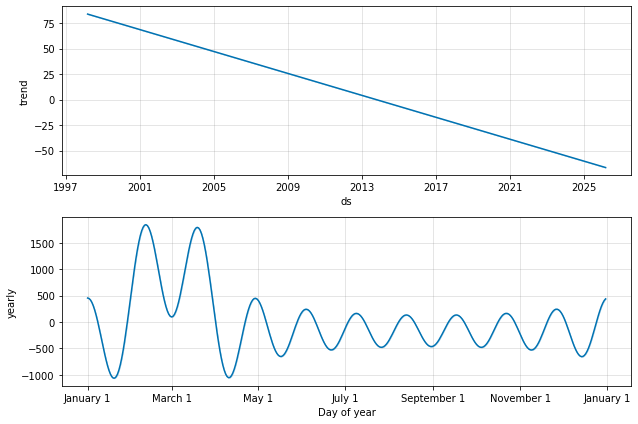

In [70]:
fig2 = model.plot_components(forecast)